In [52]:
import pandas as pd

IMDB (https://datasets.imdbws.com/) has data available for use, but it requires some preprocessing. For starters, the name of the movie and the rating aren't in the same dataset. So we will combine those to one pandas dataframe. We can also combine any of the IMDB datasets for further data mining, as they have a shared constant for every row (tconst)


In [53]:
imdb_basics = pd.read_csv('data_imdb_basics.tsv', sep='\t')
imdb_basics.shape

<ipython-input-53-66eece6d45dd>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  imdb_basics = pd.read_csv('data_imdb_basics.tsv', sep='\t')


(9621894, 9)

In [54]:
imdb_ratings = pd.read_csv('data_imdb_ratings.tsv', sep='\t')
imdb_ratings.shape

(1280237, 3)

In [55]:
# DEPRECATED DATASET WE ORIGINALLY WANTED TO USE
#netflix = pd.read_csv('netflix_titles.csv')
#netflix.shape

In [56]:
# DEPRECATED DATASET
# NETFLIX:\n{netflix.iloc[:1]}\n\n\n
print(f"IMDB BASICS:\n{imdb_basics.iloc[:5]}\n\n\nIMDB RATINGS:\n{imdb_ratings.iloc[:5]}")

IMDB BASICS:
      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  
0       0      1894      \N              1         Documentary,Short  
1       0      1892      \N              5           Animation,Short  
2       0      1892      \N              4  Animation,Comedy,Romance  
3       0      1892      \N             12           Animation,Short  
4       0      1893      \N              1              Comedy,Short  


IMDB RATINGS:
      tconst  averageRating  numVotes
0  tt0000001            5.7      1952
1  tt0000002            

In [57]:
imdb_combined = imdb_basics.merge(imdb_ratings, left_on='tconst', right_on='tconst')
print(f"{imdb_combined.shape}")

print(f"\nIMDB COMBINED:\n{imdb_combined.iloc[:5]}")

(1280236, 11)

IMDB COMBINED:
      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  \
0       0      1894      \N              1         Documentary,Short   
1       0      1892      \N              5           Animation,Short   
2       0      1892      \N              4  Animation,Comedy,Romance   
3       0      1892      \N             12           Animation,Short   
4       0      1893      \N              1              Comedy,Short   

   averageRating  numVotes  
0            5.7      1952  
1            5.8       264  
2    

Data is now in two sets, Netflix information, and IMDB information. Lets create one data set that contains Netflix, and IMDB movies together.

In [58]:
# DEPRECATED DATASET
#netflix_imdb_combined = pd.merge(netflix,imdb_combined, suffixes=['_netflix','_imdb'], left_on='title', right_on='originalTitle')
#print(f"{netflix_imdb_combined.shape}\n\nNETFLIX IMDB COMBINED:\n{netflix_imdb_combined.iloc[:1]}")

Now we have a combined dataframe of the shows available on netflix, and their imdb information. Lets filter out the TV shows

In [59]:
# DEPRECATED DATASET
#netflix_imdb_combined_no_tv = netflix_imdb_combined[(netflix_imdb_combined['type'] == 'Movie')]
#print(f"{netflix_imdb_combined_no_tv.shape}\n\nCOMBINED NO TV:\n{netflix_imdb_combined_no_tv.iloc[:1]}")

Lets also filter out an NaN rows

In [60]:

imdb_combined = imdb_combined.dropna()

 Lets start by creating our test/training data split (85/15)

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
train, test = train_test_split(imdb_combined, test_size=0.15)

print(f"TRAINING:\t{train.shape}\n{train.iloc[:1]}\n\n\nTESTING:\t{test.shape}\n{test.iloc[:1]}")

TRAINING:	(1088198, 11)
           tconst  titleType  primaryTitle originalTitle isAdult startYear  \
329539  tt0649837  tvEpisode  Lie Detector  Lie Detector       0      1962   

       endYear runtimeMinutes                 genres  averageRating  numVotes  
329539      \N             30  Comedy,Family,Fantasy            8.0        36  


TESTING:	(192036, 11)
            tconst titleType primaryTitle originalTitle isAdult startYear  \
1114521  tt6029502     movie    Holy Fire     Holy Fire       0      2017   

        endYear runtimeMinutes              genres  averageRating  numVotes  
1114521      \N             67  Action,Crime,Drama            7.0         6  


In [63]:
# Generate list of all genres
genre_list = []

genres = train['genres'].unique()
for genresgroup in genres:
  if genresgroup != genresgroup:
    print(genresgroup)
  genre_sep = genresgroup.split(',')
  genre_list = genre_list + genre_sep

# Find unique genres from our data.
list_set = set(genre_list)
unique_list_genre = (list(list_set))
unique_list_genre.remove("\\N")
for genre in unique_list_genre:
  print(genre)

Crime
Comedy
Mystery
History
Talk-Show
Music
Fantasy
Sport
Biography
Musical
News
Sci-Fi
Action
Thriller
Reality-TV
Animation
Family
Drama
Romance
Western
Short
Film-Noir
War
Adult
Documentary
Horror
Game-Show
Adventure


In [64]:
# Create dictionary for all genres
genre_split = {}
# Add each genre as a key, and its dictionary as the value
for genre in unique_list_genre:
  genre_split[genre] = train.loc[(train['genres'].str.contains(genre))]

print(genre_split['Horror'].iloc[:1])

            tconst  titleType  primaryTitle originalTitle isAdult startYear  \
1275506  tt9766592  tvEpisode  Evil Origins  Evil Origins       0      2019   

        endYear runtimeMinutes  genres  averageRating  numVotes  
1275506      \N             \N  Horror            8.9        17  


Now all of our data is split by genre as well.

In [65]:
genre_split_avg = {}
# for each genre
for genre in unique_list_genre:
  #initalize values
  avg = 0
  count = 0
  #declare working genre
  print(f"GENRE: {genre}:")
  #iterate over dataframe to find the average rating, and number of movies
  for index, row in genre_split[genre].iterrows():
    #print(row['primaryTitle'], row['averageRating'])
    avg = avg + row['averageRating']
    count = count + 1
  avg = avg/count
  print(f"\nAverage: {avg}, Number: {count}\n\n")
  #split dataframe above and below average
  genre_split_avg['B'+genre] = genre_split[genre][genre_split[genre]['averageRating'] <= avg]
  genre_split_avg['A'+genre] = genre_split[genre][genre_split[genre]['averageRating'] > avg]

GENRE: Crime:

Average: 7.140301703748902, Number: 116273


GENRE: Comedy:

Average: 6.9893344378880276, Number: 342823


GENRE: Mystery:

Average: 7.134513124470774, Number: 53145


GENRE: History:

Average: 7.347170053613241, Number: 31149


GENRE: Talk-Show:

Average: 6.871711532070457, Number: 30090


GENRE: Music:

Average: 6.964091256413025, Number: 45805


GENRE: Fantasy:

Average: 7.066968057022163, Number: 45456


GENRE: Sport:

Average: 7.10913630479015, Number: 21628


GENRE: Biography:

Average: 7.218271172748119, Number: 22281


GENRE: Musical:

Average: 6.628484905838942, Number: 10567


GENRE: News:

Average: 6.6906155120066115, Number: 14492


GENRE: Sci-Fi:

Average: 6.727242295613778, Number: 28977


GENRE: Action:

Average: 7.017206052520868, Number: 135679


GENRE: Thriller:

Average: 6.411028282783367, Number: 44939


GENRE: Reality-TV:

Average: 6.958737497143436, Number: 56887


GENRE: Animation:

Average: 7.09913815637715, Number: 130070


GENRE: Family:

Averag

In [66]:
print(f"{genre_split_avg['AAction'].iloc[:1]}\n\n\n{genre_split_avg['BAction'].iloc[:1]}")

           tconst  titleType                primaryTitle  \
292322  tt0566897  tvEpisode  M.M.O.R.P.D./Old McDodgers   

                     originalTitle isAdult startYear endYear runtimeMinutes  \
292322  M.M.O.R.P.D./Old McDodgers       0      2004      \N             21   

                            genres  averageRating  numVotes  
292322  Action,Adventure,Animation            8.1        63  


           tconst  titleType  \
982125  tt3775672  tvEpisode   

                                             primaryTitle  \
982125  Double Date It Is Full of Danger Speedy's Doub...   

                                            originalTitle isAdult startYear  \
982125  Double Date It Is Full of Danger Speedy's Doub...       0      1990   

       endYear runtimeMinutes                   genres  averageRating  \
982125      \N             24  Action,Animation,Comedy            6.2   

        numVotes  
982125         6  


lets plot rating against time. where the x axis is time (year) and y axis is rating

In [67]:
# rating_data = { 'genre': [title,year,rating],[title,year,rating], 'genre': [title,year,rating] }
rating_data = {}

for genre in genre_split:
  title_year_rating = []
  #print(genre, '->', genre_split[genre].iloc[:1])
  for index, row in genre_split[genre].iterrows():

    title = row['primaryTitle']
    year = row['startYear']
    rating = row['averageRating']
    tyr = [title,year,rating]
    title_year_rating.append(tyr)

  rating_data[genre] = title_year_rating
  

In [68]:
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

[2013] [7.3]
[2013, 1995] [7.3, 7.6]
[2013, 1995, 2005] [7.3, 7.6, 2.7]
[2013, 1995, 2005, 1982] [7.3, 7.6, 2.7, 7.2]
[2013, 1995, 2005, 1982, 1987] [7.3, 7.6, 2.7, 7.2, 8.2]
[2013, 1995, 2005, 1982, 1987, 2004] [7.3, 7.6, 2.7, 7.2, 8.2, 6.1]
[2013, 1995, 2005, 1982, 1987, 2004, 2017] [7.3, 7.6, 2.7, 7.2, 8.2, 6.1, 6.7]
[2013, 1995, 2005, 1982, 1987, 2004, 2017, 2004] [7.3, 7.6, 2.7, 7.2, 8.2, 6.1, 6.7, 7.8]
[2013, 1995, 2005, 1982, 1987, 2004, 2017, 2004, 2003] [7.3, 7.6, 2.7, 7.2, 8.2, 6.1, 6.7, 7.8, 7.2]
[2013, 1995, 2005, 1982, 1987, 2004, 2017, 2004, 2003, 1985] [7.3, 7.6, 2.7, 7.2, 8.2, 6.1, 6.7, 7.8, 7.2, 6.5]
best fit line:
y = -13.82 + 0.01x
[1962] [8.0]
[1962, 1951] [8.0, 5.3]
[1962, 1951, 1978] [8.0, 5.3, 7.4]
[1962, 1951, 1978, 1959] [8.0, 5.3, 7.4, 7.3]
[1962, 1951, 1978, 1959, 1990] [8.0, 5.3, 7.4, 7.3, 6.2]
[1962, 1951, 1978, 1959, 1990, 2007] [8.0, 5.3, 7.4, 7.3, 6.2, 4.6]
[1962, 1951, 1978, 1959, 1990, 2007, 1987] [8.0, 5.3, 7.4, 7.3, 6.2, 4.6, 6.1]
[1962, 1951, 1978, 

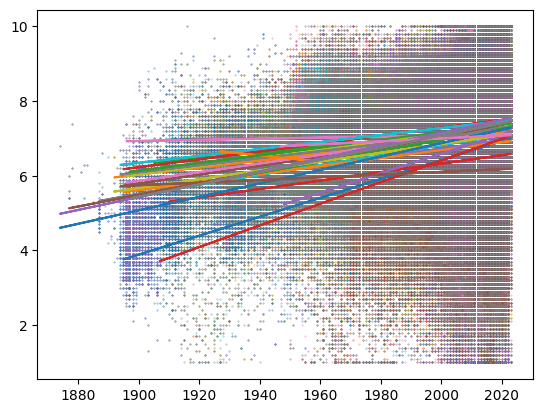

In [69]:
import matplotlib.pyplot as plt

for genre in genre_split:
  year = []
  rating = []
  
  for index, row in genre_split[genre].iterrows():
    if row['startYear'] != '\\N':
      
      year.append(int(row['startYear']))
      rating.append(float(row['averageRating']))
      if len(year) <= 10: 
        print(year, rating)
  
  plt.scatter(year, rating, s=.1, alpha=.75)

  a, b = best_fit(year, rating)

  yfit = [a + b * yeari for yeari in year]
  plt.plot(year, yfit)

Putting all this info onto one graph is extremely messy. Lets clean it up a bit

best fit line:
y = -13.82 + 0.01x


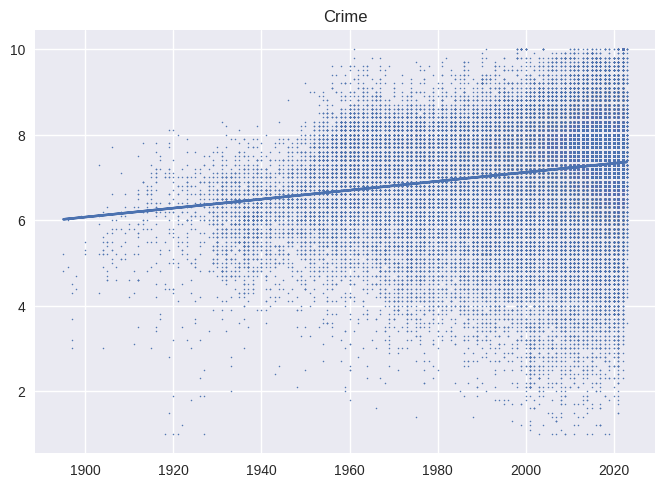

best fit line:
y = -11.83 + 0.01x


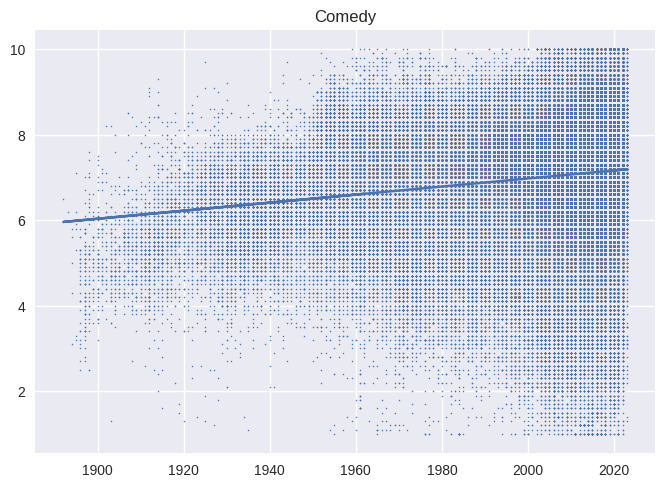

best fit line:
y = -8.62 + 0.01x


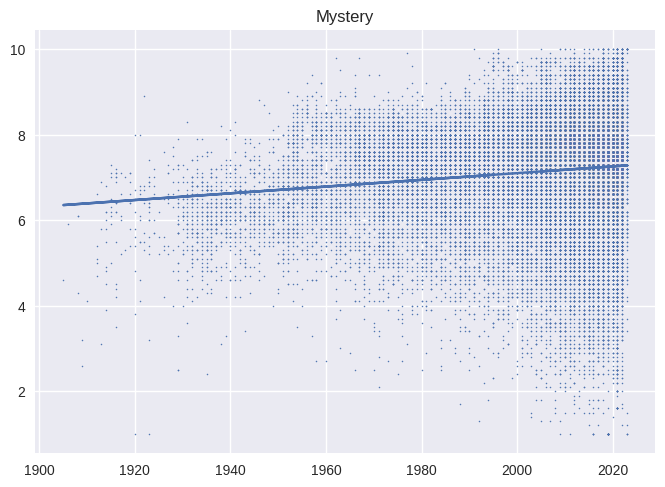

best fit line:
y = -13.84 + 0.01x


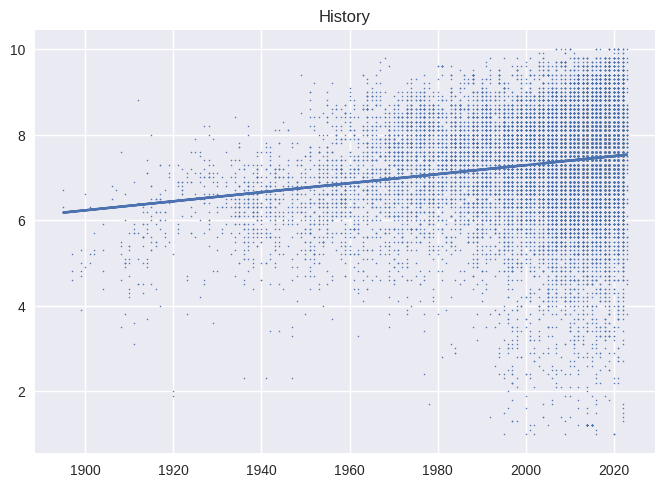

best fit line:
y = -16.02 + 0.01x


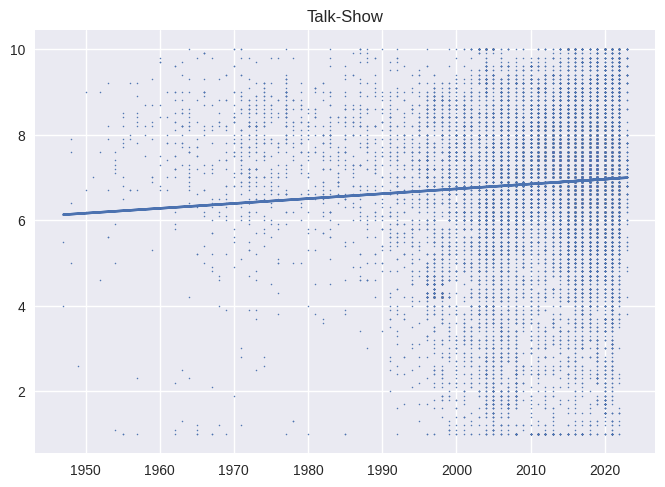

best fit line:
y = -16.91 + 0.01x


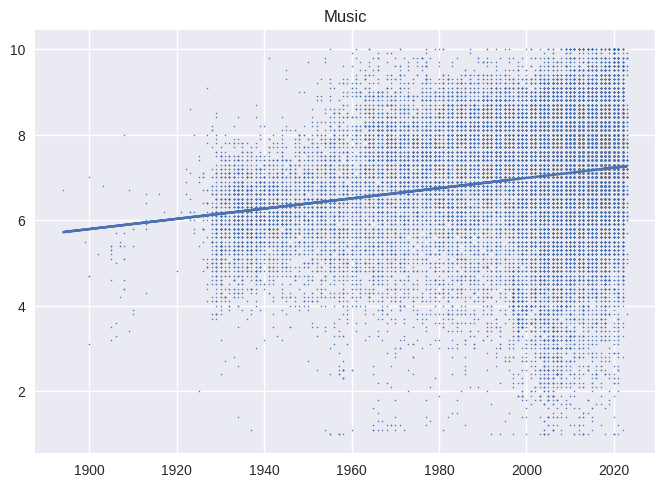

best fit line:
y = -16.18 + 0.01x


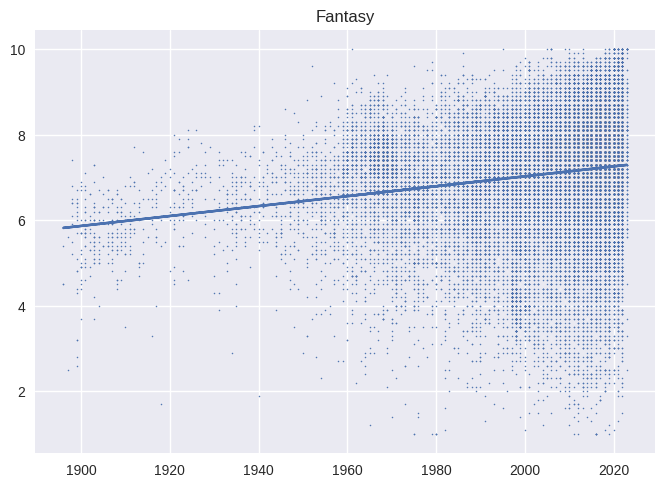

best fit line:
y = -22.68 + 0.01x


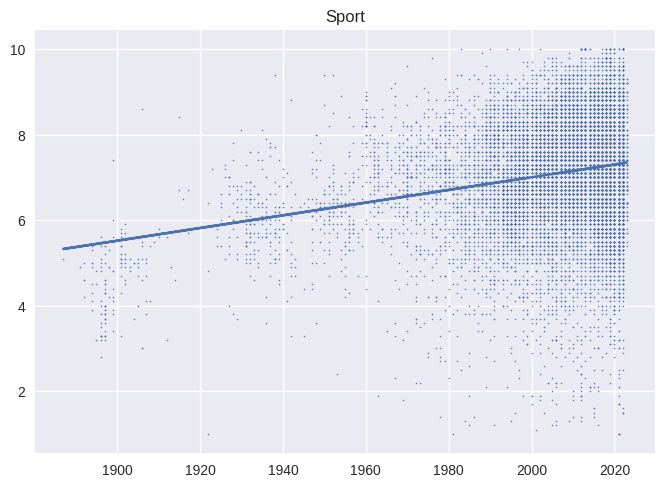

best fit line:
y = -14.99 + 0.01x


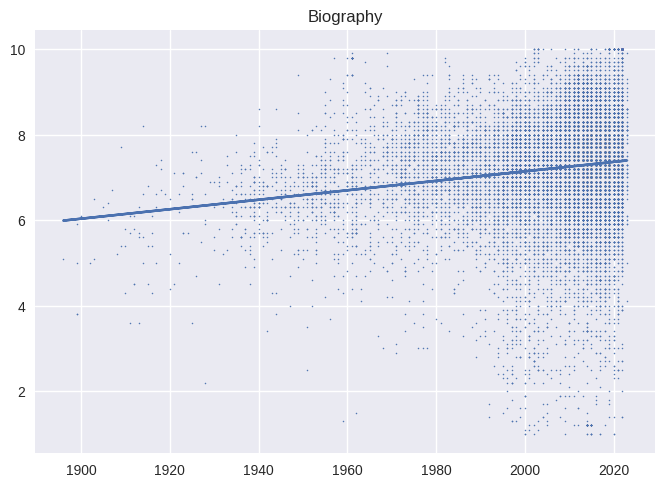

best fit line:
y = -19.66 + 0.01x


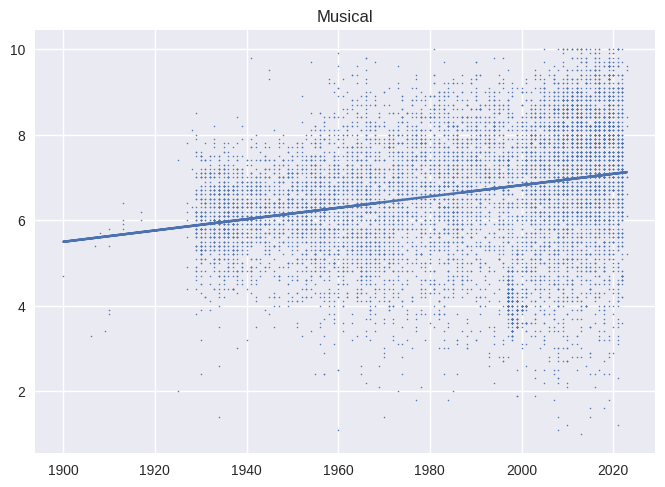

best fit line:
y = -44.25 + 0.03x


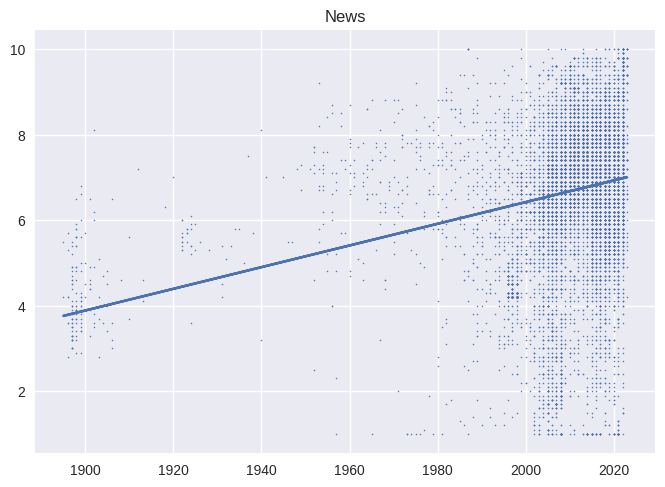

best fit line:
y = -14.73 + 0.01x


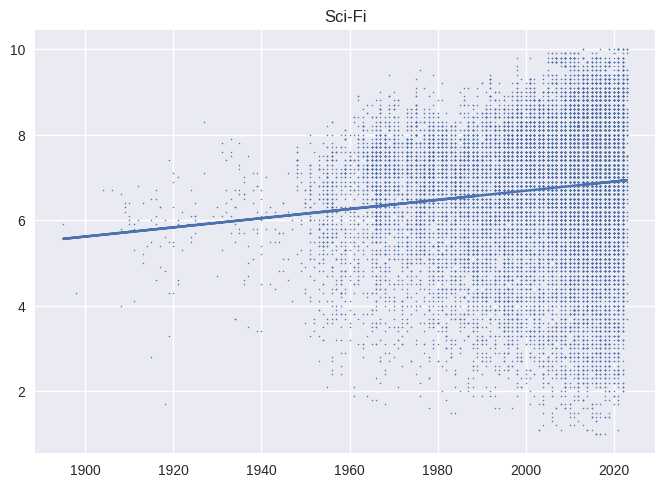

best fit line:
y = -22.46 + 0.01x


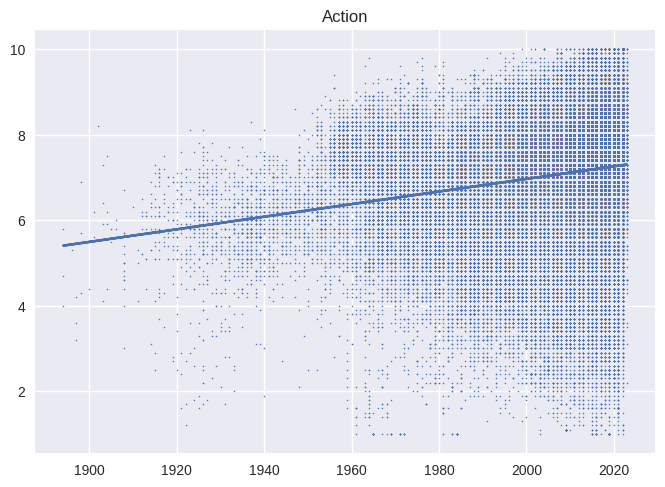

best fit line:
y = -16.38 + 0.01x


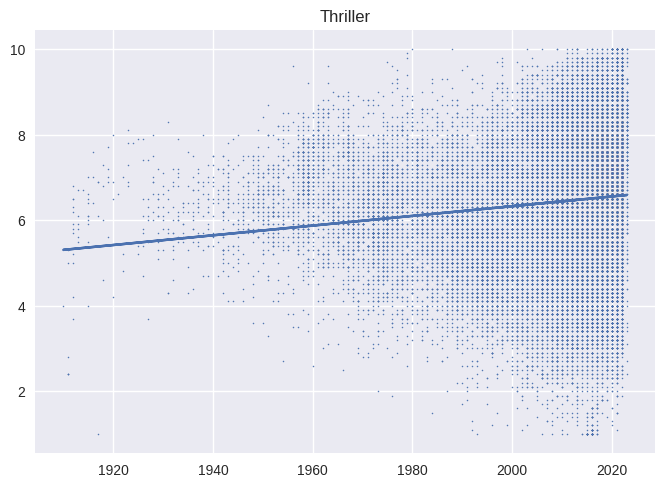

best fit line:
y = -45.40 + 0.03x


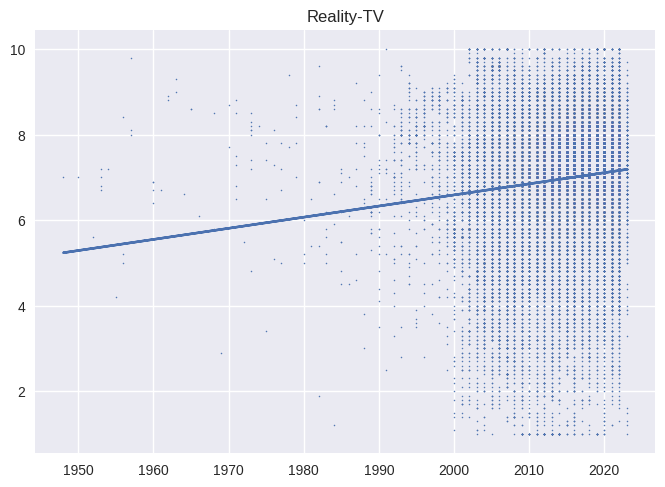

best fit line:
y = -24.27 + 0.02x


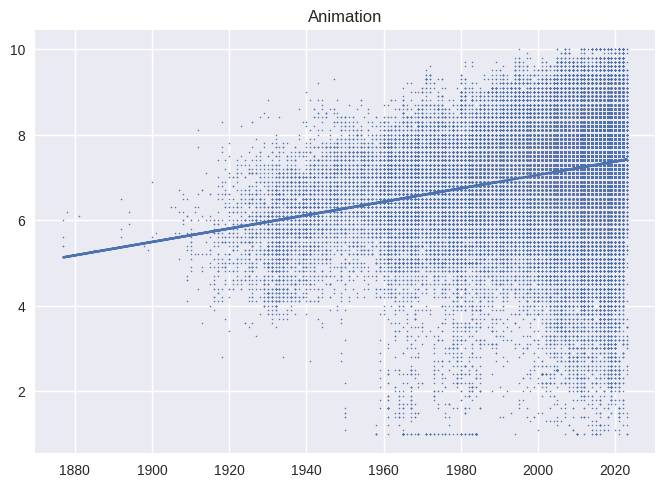

best fit line:
y = 4.03 + 0.00x


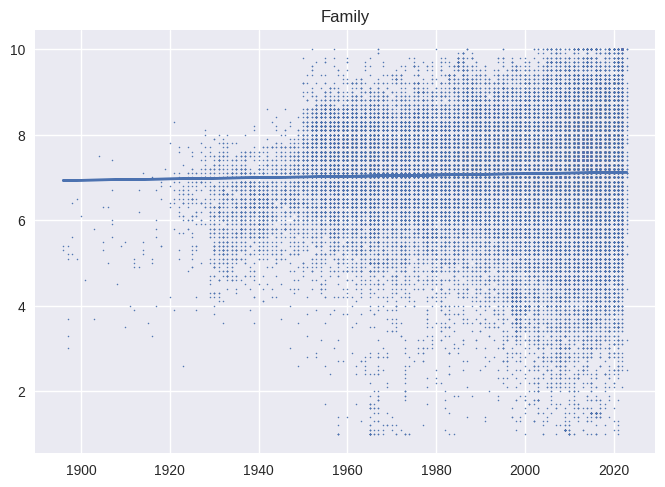

best fit line:
y = -11.90 + 0.01x


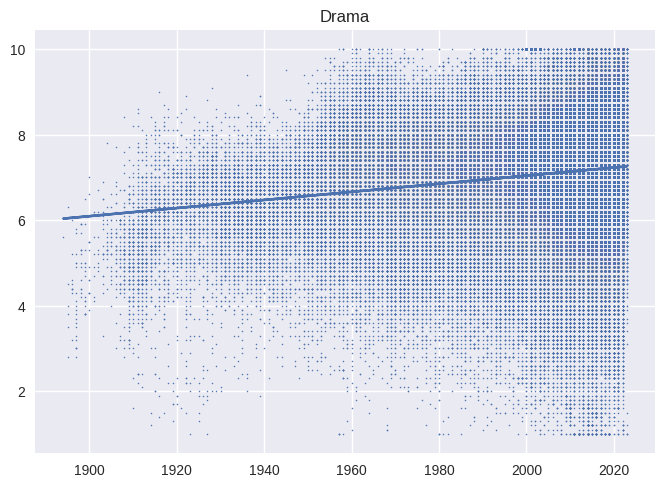

best fit line:
y = -16.76 + 0.01x


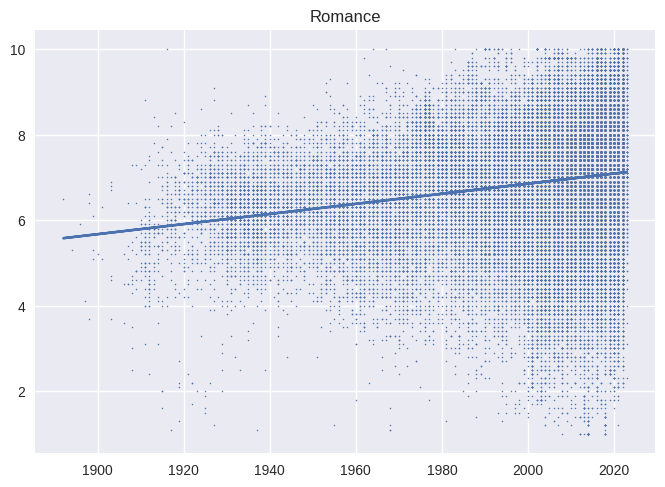

best fit line:
y = -11.32 + 0.01x


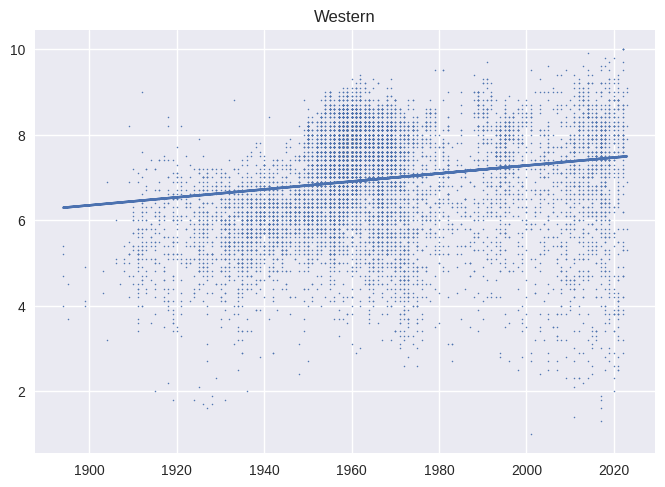

best fit line:
y = -29.15 + 0.02x


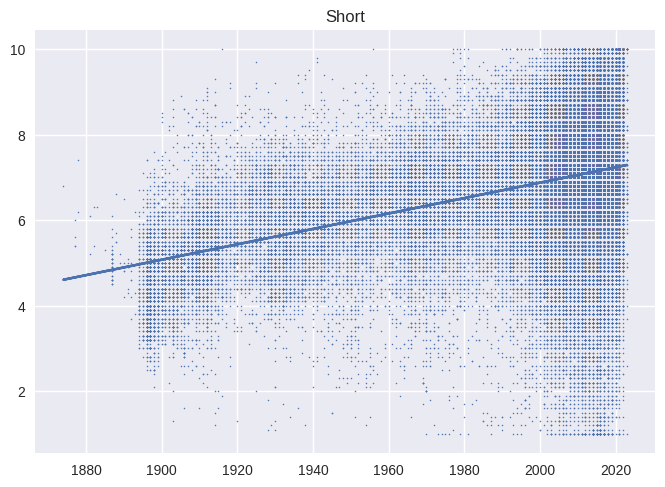

best fit line:
y = 22.81 + -0.01x


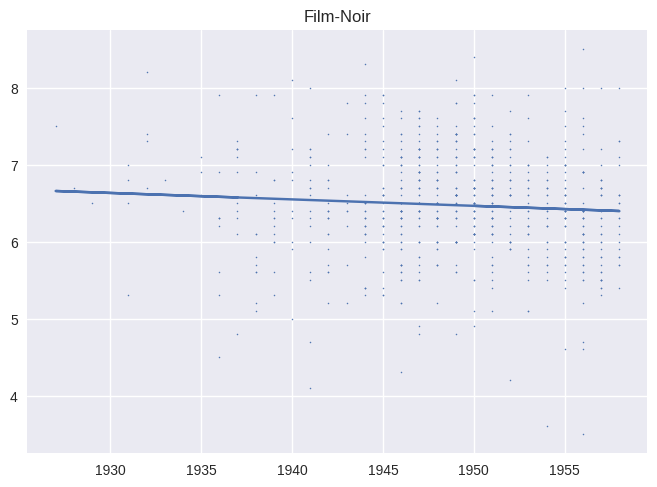

best fit line:
y = -13.48 + 0.01x


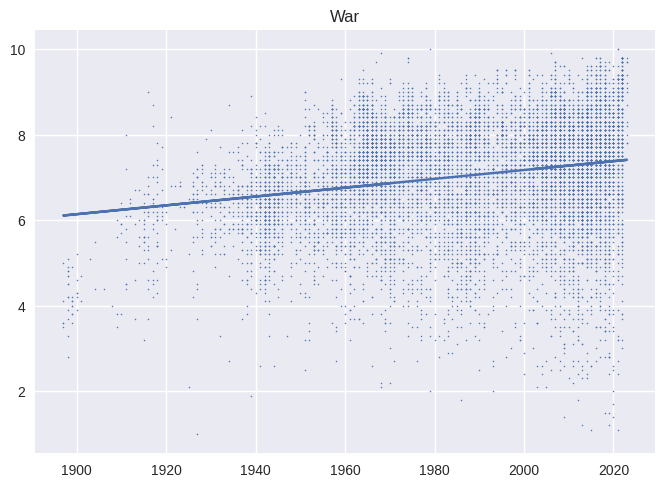

best fit line:
y = -51.55 + 0.03x


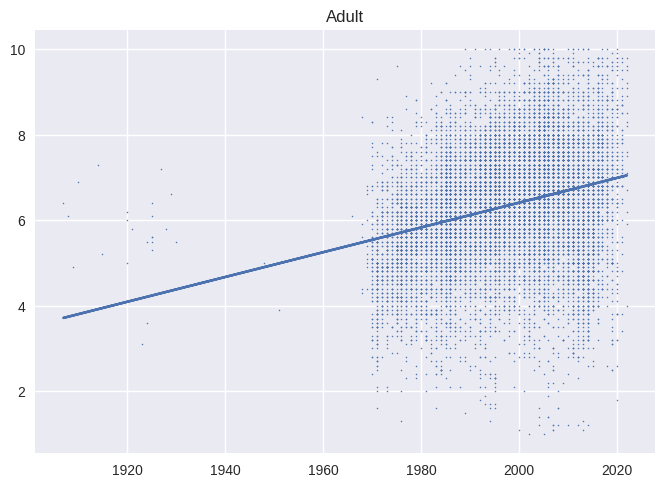

best fit line:
y = -27.31 + 0.02x


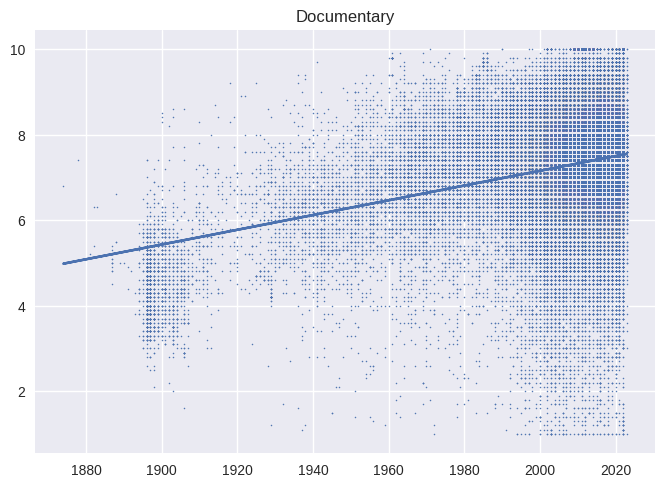

best fit line:
y = -1.07 + 0.00x


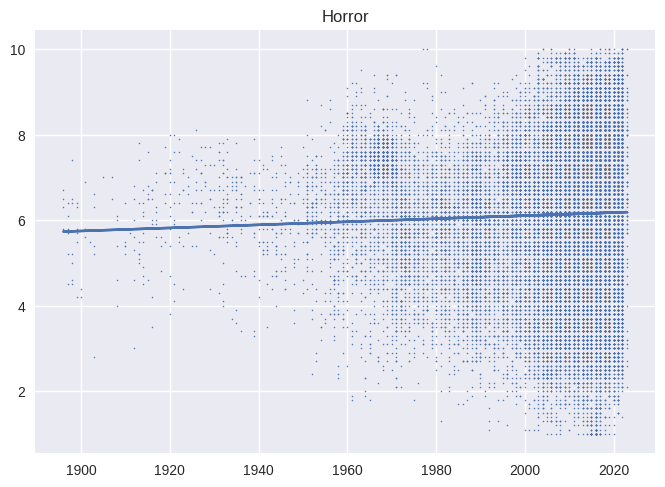

best fit line:
y = -0.83 + 0.00x


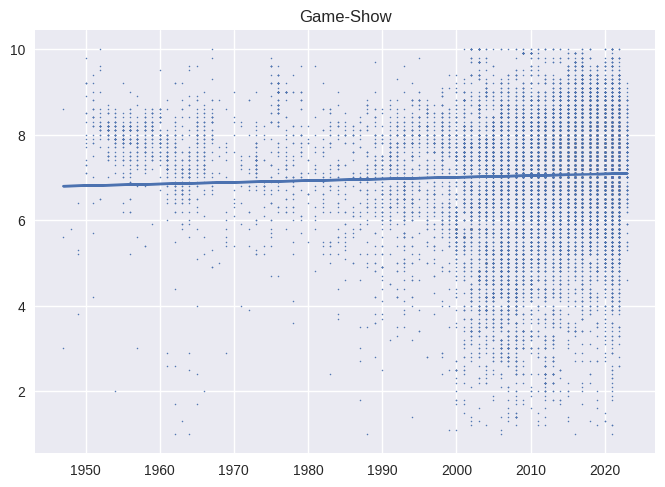

best fit line:
y = -25.76 + 0.02x


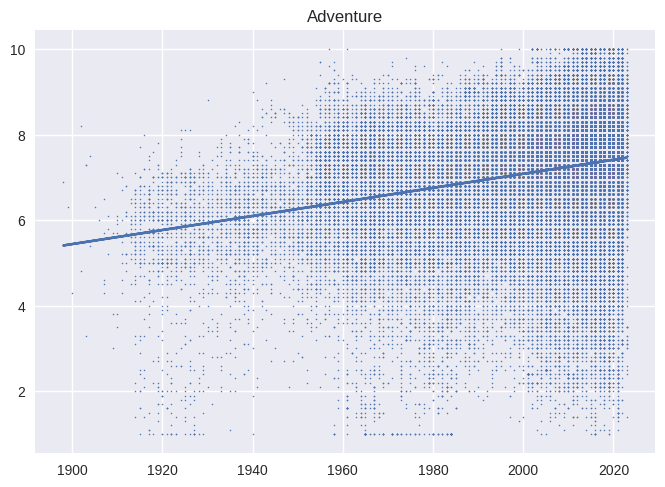

<Figure size 800x550 with 0 Axes>

In [81]:
import matplotlib.pyplot as plt
bestfits = {}
for genre in genre_split:
  year = []
  rating = []
  
  for index, row in genre_split[genre].iterrows():
    if row['startYear'] != '\\N':
      year.append(int(row['startYear']))
      rating.append(float(row['averageRating']))
  
  plt.title(genre)
  plt.scatter(year, rating, s=.6)

  a, b = best_fit(year, rating)
  bestfits[genre] = [a,b]
  yfit = [a + b * yeari for yeari in year]
  plt.plot(year, yfit)
  plt.show()
  plt.clf()

In [97]:
print(bestfits)
highestb = 0
highestbg = ""
highesta = 0
highestag = ""

lowestb = 0
lowestbg = ""
lowesta = 0
lowestag = ""

for genre in bestfits:
  if bestfits[genre][0] > highestb:
    highestb = bestfits[genre][0]
    highestbg = genre
  if bestfits[genre][1] > highesta:
    highesta = bestfits[genre][1]
    highestag = genre
  if bestfits[genre][0] < lowestb:
    lowestb = bestfits[genre][0]
    lowestbg = genre
  if bestfits[genre][1] < lowesta:
    lowesta = bestfits[genre][1]
    lowestag = genre

print(f"Highest starting value: {highestbg} with {highestb}\nMost improvement over the years: {highestag} with {highesta}")
print(f"Lowest starting value: {lowestbg} with {lowestb}\nMost degraded over the years: {lowestag} with {lowesta}")

{'Crime': [-13.821745561537607, 0.010470354048061358], 'Comedy': [-11.83167029386306, 0.00940242466007671], 'Mystery': [-8.621948155661023, 0.00786041153552641], 'History': [-13.842521780955195, 0.010564420140787548], 'Talk-Show': [-16.019122779971433, 0.011374874919886663], 'Music': [-16.913453554397233, 0.011950107948661049], 'Fantasy': [-16.179743570955146, 0.011602182654993628], 'Sport': [-22.68223725106914, 0.014842725328861698], 'Biography': [-14.989444700335415, 0.011064863310323431], 'Musical': [-19.66449828598178, 0.013241255526737664], 'News': [-44.250996693081056, 0.025336138418507133], 'Sci-Fi': [-14.729772740638797, 0.010708665227708343], 'Action': [-22.457416469198453, 0.014710239169623931], 'Thriller': [-16.378506591775658, 0.01135245513259927], 'Reality-TV': [-45.398354366457, 0.025993795814864322], 'Animation': [-24.27267416916578, 0.015664855778108038], 'Family': [4.032833908601396, 0.0015264390202278713], 'Drama': [-11.89822596850826, 0.009469073310563979], 'Romance'

This is interesting information since the it implies the starting values are determining future popularity, what was once the most popular, is now least, and what was unpopular, is now popular